In [1]:
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [2]:
labels = pd.read_csv('bbox.csv')

In [3]:
labels.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
labels.head()

,file,label,valid,test,id,url,created_time,city_id,month_id,lat,...,clothing_category,wearing_jacket,wearing_hat,wearing_glasses,multiple_layers,old_file,new_x1,new_y1,new_x2,new_y2
0,dff8b1017226167906804e492526d9e6_7268615369410...,Solid;Red;Long sleeve;One layer,False,False,2667,data/streetstyle27k/d/f/f/dff8b101722616790680...,2014-05-23 18:11:09+00,9.0,2014_5,41.007833,...,NaN,No,No,No,One layer,d/f/f/dff8b1017226167906804e492526d9e6_7268615...,247,293,386,642
1,d2ff74a75e0ff19ed59e411beda2ec68_6997431417181...,Graphics;White;Short sleeve;Round;Shirt;One layer,False,False,3728855,data/streetstyle27k/d/2/f/d2ff74a75e0ff19ed59e...,2014-04-16 08:11:44+00,8.0,2014_4,23.042395,...,Shirt,No,No,No,One layer,d/2/f/d2ff74a75e0ff19ed59e411beda2ec68_6997431...,244,159,449,499
2,12051bc72e409d4b0b3fd64b59a25911_7016871195395...,Floral;More than 1 color;Long sleeve;Round;Dre...,False,False,3727139,data/streetstyle27k/1/2/0/12051bc72e409d4b0b3f...,2014-04-19 00:34:04+00,3.0,2014_4,4.694167,...,Dress,No,No,No,Multiple layers,1/2/0/12051bc72e409d4b0b3fd64b59a25911_7016871...,204,109,449,568
3,7728cbdb5105e87ec54535ef5317b964_7258885159552...,Solid;Black;Short sleeve;Shirt;One layer;colla...,False,False,3725424,data/streetstyle27k/7/7/2/7728cbdb5105e87ec545...,2014-05-22 09:57:55+00,16.0,2014_5,14.644636,...,Shirt,No,No,No,One layer,7/7/2/7728cbdb5105e87ec54535ef5317b964_7258885...,427,242,504,479
4,ee6e90f818bed706b5b73450fdb76981_7104454913593...,Solid;Blue;Short sleeve;Folded;Shirt;One layer...,False,False,3724996,data/streetstyle27k/e/e/6/ee6e90f818bed706b5b7...,2014-05-01 02:35:24+00,1.0,2014_5,13.802260,...,Shirt,No,No,Yes,One layer,e/e/6/ee6e90f818bed706b5b73450fdb76981_7104454...,361,43,462,299


In [5]:
img = Image.open('../../data/streetstyle27k/d/f/f/dff8b1017226167906804e492526d9e6_726861536941066133_632544368.jpg')

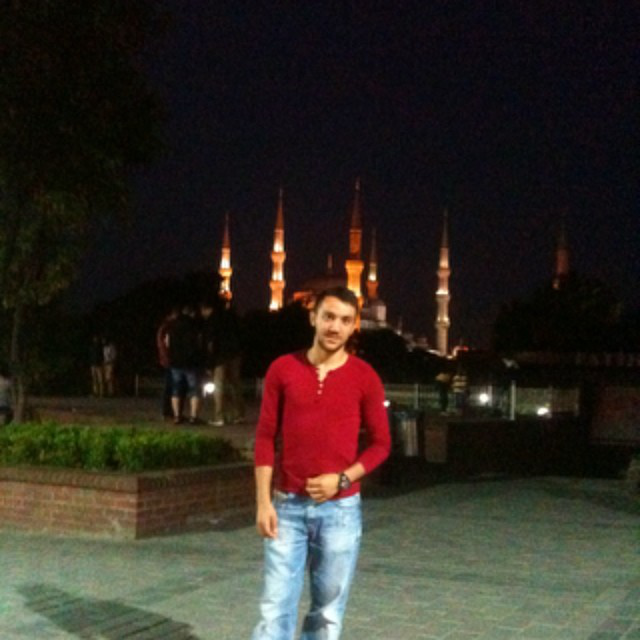

In [6]:
img

### Visualisation of Image after cropping using the bounding box predicted by YOLO net

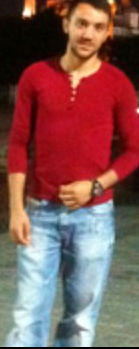

In [7]:
img.crop(tuple(labels[['new_x1', 'new_y1', 'new_x2', 'new_y2']].iloc[i]))

In [25]:
tuple(labels[['new_x1', 'new_y1', 'new_x2', 'new_y2']].iloc[i])

(247, 293, 386, 642)

In [34]:
len(labels.file.unique())

23908

### Using YOLO bounding box values to get Full body crops from StreetStyle Dataset

In [ ]:
for index in tqdm(labels.index, position=0): 
    try:
        img = Image.open(bbox.url.iloc[index])
        img = img.crop(tuple(bbox[['new_x1', 'new_y1', 'new_x2', 'new_y2']].iloc[index]))
        cropped_img_path= './data/full_body_cropped/'+str(labels.file.iloc[index])
    #     print(cropped_img_path)
        img.save(cropped_img_path)
    except e:
        print(e)
        continue